<a href="https://colab.research.google.com/github/harshita1017/LGMVIP-DataScience/blob/main/Exploratory_Data_Analysis_on_Dataset_Terrorism_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import folium
# from folium.plugins import MarkerCluster

%matplotlib inline

In [ ]:
data = pd.read_csv("globalterrorismdb_0718dist.csv",encoding ='latin =1')

data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,31,33,61,62,76,79,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970.0,7.0,2.0,NaN,0.0,NaN,58.0,Dominican Republic,2.0,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970.0,0.0,0.0,NaN,0.0,NaN,130.0,Mexico,1.0,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,6.0,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970.0,1.0,0.0,NaN,0.0,NaN,160.0,Philippines,5.0,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,10.0,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970.0,1.0,0.0,NaN,0.0,NaN,78.0,Greece,8.0,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970.0,1.0,0.0,NaN,0.0,NaN,101.0,Japan,4.0,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0.0,NaN,NaN,1.0,1.0,1.0,-9.0,NaN,NaN,0.0,1.0,0.0,7.0,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29975 entries, 0 to 29974
Columns: 135 entries, eventid to related
dtypes: float64(77), int64(1), object(57)
memory usage: 30.9+ MB


In [ ]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.997500e+04,29974.000000,29974.000000,29974.000000,29974.000000,29974.000000,29974.000000,28397.000000,2.839700e+04,29974.000000,29974.000000,29974.000000,29974.000000,29974.000000,29974.000000,5056.000000,29974.000000,29974.000000,29974.000000,29974.000000,38.000000,2.000000,29974.000000,28408.000000,29817.000000,373.000000,279.000000,336.000000,62.000000,45.000000,61.000000,0.0,29974.000000,73.000000,11.000000,29974.000000,5276.000000,1092.000000,1096.000000,278.000000,19.000000,18.000000,8.0,8.000000,33.000000,29974.000000,24542.000000,2092.000000,1751.000000,339.000000,293.000000,65.000000,60.000000,24447.000000,1960.000000,2107.000000,22698.000000,1915.000000,1850.000000,29974.000000,13088.000000,6.137000e+03,29803.000000,2216.000000,2216.000000,630.000000,430.000000,29647.000000,4.970000e+02,1.0,1.090000e+02,2.0,852.000000,644.000000,29974.000000,29974.000000,29974.000000,29974.000000
mean,1.980791e+11,1980.792086,6.350404,15.175952,0.016614,160.690498,5.141222,19.813379,-3.067458e+03,1.385734,0.023287,0.992026,0.992961,0.850971,-1.304531,1.152097,0.073564,0.918863,0.000934,3.139187,4.763158,3.000000,7.449156,43.585363,131.047154,9.042895,47.390681,171.407738,6.354839,40.244444,137.573770,NaN,0.053847,0.219178,0.090909,0.001735,3.651440,-75.500916,-0.060219,4.607914,0.947368,5.611111,1.0,8.000000,0.272727,6.633215,10.621343,6.443595,9.830954,6.578171,9.617747,6.292308,10.266667,2.194380,0.306122,0.633128,1.712221,0.793734,0.074595,0.698706,3.497249,2.676960e+05,0.074355,2.678249,0.123646,24.317460,36.625581,0.016933,3.490094e+06,20000.0,1.119712e+06,0.0,2.954225,10.520186,-3.280943,-3.235337,0.181290,-2.434877
std,1.214180e+09,4.065549,3.398355,8.881986,0.127824,149.993758,3.231156,25.440026,5.114460e+05,1.076467,0.150816,0.088940,0.083607,0.356123,3.424153,0.445227,0.261064,0.273050,0.030550,1.943685,2.476203,1.414214,6.606978,32.281066,75.017245,6.828410,29.212224,107.492188,5.942613,28.494940,75.283787,NaN,0.225719,0.416552,0.301511,0.041616,78.646443,42.718302,1.749110,3.121061,0.229416,3.821593,0.0,2.828427,0.452267,2.438005,7.156400,1.906011,6.957995,2.159798,7.819275,1.528102,7.837041,9.497849,5.571491,3.189296,11.478994,17.436068,0.393089,0.701981,0.525349,7.259924e+06,0.262352,459.705067,3.903354,152.748747,183.365600,0.129021,4.525213e+07,NaN,4.386958e+06,0.0,1.362247,35.931219,4.422357,4.477072,0.764082,4.371263
min,1.980000e+02,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,11.000000,1.000000,7.000000,6.000000,NaN,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,0.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.979013e+11,1979.000000,3.000000,8.000000,0.000000,61.000000,2.000000,6.313712,-8.304792e+01,1.000000,0.000000,1.000000,1.000000,1.

In [ ]:
data.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999938,-0.016455,-0.005607,-0.052749,-0.303581,-0.107868,-0.397326,-0.001959,0.146019,0.075924,-0.006376,0.038777,-0.101992,0.009515,-0.275455,0.090483,0.056705,0.027477,-0.027862,0.123756,1.0,0.101986,0.102869,-0.279093,-0.090140,-0.140391,-0.157200,-0.234967,-0.295142,-0.143314,NaN,0.065596,-0.419577,-0.615382,-0.017553,0.390507,0.346095,-0.075425,0.090983,0.542170,0.689273,NaN,1.0,-0.333397,0.014502,-0.076436,0.022178,-0.031753,0.064735,0.200044,0.048367,-0.000928,0.093492,0.025007,0.144066,0.037814,0.026743,0.127712,0.166385,0.199217,0.006178,-0.034121,0.018137,-0.020043,0.159516,0.065614,-0.078280,-0.001625,NaN,-0.161486,NaN,0.101043,0.076948,0.044833,0.042402,-0.182805,-0.039726
iyear,0.999938,1.000000,-0.024880,-0.005934,-0.052738,-0.303519,-0.107543,-0.396858,-0.001875,0.146186,0.075968,-0.006799,0.038784,-0.101985,0.009640,-0.275480,0.090639,0.056693,0.027351,-0.027699,0.123898,1.0,0.102099,0.102930,-0.278893,-0.090169,-0.140485,-0.157305,-0.236787,-0.296905,-0.141438,NaN,0.065608,-0.420045,-0.617065,-0.017587,0.390335,0.347535,-0.074218,0.096440,0.539178,0.687489,NaN,1.0,-0.274232,0.014602,-0.076363,0.022351,-0.031937,0.064395,0.201260,0.049947,-0.000245,0.093379,0.024777,0.143775,0.037629,0.026560,0.127492,0.166275,0.199241,0.006101,-0.034162,0.017917,-0.020090,0.159514,0.065279,-0.078228,-0.001293,NaN,-0.162933,NaN,0.100564,0.076718,0.044883,0.042454,-0.182853,-0.039670
imonth,-0.016455,-0.024880,1.000000,0.020717,0.006874,0.000489,-0.030625,-0.037550,-0.009862,-0.025248,-0.008110,-0.004002,-0.001182,0.003811,-0.012763,0.004686,-0.022362,0.001804,0.014200,-0.019249,-0.014374,NaN,-0.018876,-0.012928,-0.011786,0.004277,0.011733,0.013996,0.236931,0.254254,-0.151008,NaN,-0.000198,0.033174,0.218543,0.003958,0.028145,0.034005,-0.098630,0.058064,0.446009,0.010644,NaN,-1.0,0.239268,-0.012136,-0.012106,-0.020273,0.021361,0.017610,-0.116118,-0.124236,-0.051836,0.010304,0.034115,0.038902,0.020474,0.026928,0.025949,0.002902,-0.002477,0.008318,0.007981,0.023713,0.005811,0.005946,-0.011805,-0.004838,-0.036200,NaN,0.168966,NaN,0.027839,0.009635,-0.012532,-0.012519,0.009892,-0.012167
iday,-0.005607,-0.005934,0.020717,1.000000,-0.000430,0.017323,0.008996,-0.000417,-0.005882,-0.021315,-0.001116,0.009420,-0.002510,0.015505,-0.005207,-0.006670,-0.011798,0.000453,-0.001221,-0.038789,-0.166605,-1.0,-0.003425,-0.005528,0.011734,-0.161912,-0.128435,-0.130437,-0.060385,-0.228484,-0.122599,NaN,-0.004909,-0.400577,-0.518541,-0.003624,-0.022341,-0.017554,-0.006696,0.116185,0.235831,0.636483,NaN,1.0,-0.353345,-0.026275,0.024469,0.035200,0.008644,0.080078,-0.035868,-0.041529,0.004321,-0.005813,0.019564,0.036446,-0.001149,0.009407,0.025462,0.004126,0.013543,0.017040,-0.006531,-0.035541,-0.012672,-0.057355,-0.017528,-0.003877,0.000404,NaN,0.007095,NaN,0.029853,-0.044259,-0.006630,-0.007133,0.017309,0.002171
extended,-0.052749,-0.052738,0.006874,-0.000430,1.000000,-0.047492,0.000700,-0.024251,0.000755,0.013798,-0.007956,-0.005955,0.010944,0.038271,-0.046448,0.010425,-0.026629,0.036713,-0.003975,0.156670,0.167544,NaN,-0.029379,-0.022167,-0.001419,-0.000725,0.070794,-0.045868,0.240366,0.127313,-0.273456,NaN,-0.011350,NaN,NaN,0.007125,0.023102,0.117160,0.045353,0.159792,NaN,NaN,NaN,NaN,-0.288675,0.2

In [ ]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
data.columns.to_list()

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [ ]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day', 'country_txt':'Country','provstate':'state',
                         'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
data.columns

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [14]:
data = data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
                      'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
data.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970.0,7.0,2.0,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970.0,0.0,0.0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970.0,1.0,0.0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970.0,1.0,0.0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970.0,1.0,0.0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [16]:
data.shape

(29975, 18)

In [18]:
data.isnull().sum()

Year               1
Month              1
Day                1
Country            1
state            120
Region             1
city               1
latitude        1578
longitude       1578
AttackType         1
Killed          5528
Wounded         7277
Target           359
Summary        28883
Group              1
Target_type        1
Weapon_type        1
Motive         29154
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29975 entries, 0 to 29974
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         29974 non-null  float64
 1   Month        29974 non-null  float64
 2   Day          29974 non-null  float64
 3   Country      29974 non-null  object 
 4   state        29855 non-null  object 
 5   Region       29974 non-null  object 
 6   city         29974 non-null  object 
 7   latitude     28397 non-null  float64
 8   longitude    28397 non-null  float64
 9   AttackType   29974 non-null  object 
 10  Killed       24447 non-null  float64
 11  Wounded      22698 non-null  float64
 12  Target       29616 non-null  object 
 13  Summary      1092 non-null   object 
 14  Group        29974 non-null  object 
 15  Target_type  29974 non-null  object 
 16  Weapon_type  29974 non-null  object 
 17  Motive       821 non-null    object 
dtypes: float64(7), object(11)
memory usage: 4.1+ M

In [20]:
data.describe(include='all')

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
count,29974.000000,29974.000000,29974.000000,29974,29855,29974,29974,28397.000000,2.839700e+04,29974,24447.000000,22698.000000,29616,1092,29974,29974,29974,821
unique,NaN,NaN,NaN,138,895,11,5446,NaN,NaN,9,NaN,NaN,19116,1057,1240,22,12,377
top,NaN,NaN,NaN,El Salvador,Northern Ireland,Western Europe,Unknown,NaN,NaN,Bombing/Explosion,NaN,NaN,Military Unit,09/28/1972: A letter bomb addressed to a local...,Unknown,Business,Explosives,Unknown
freq,NaN,NaN,NaN,3616,2258,8127,1885,NaN,NaN,13597,NaN,NaN,1163,6,9461,5684,13567,86
mean,1980.792086,6.350404,15.175952,NaN,NaN,NaN,NaN,19.813379,-3.067458e+03,NaN,2.194380,1.712221,NaN,NaN,NaN,NaN,NaN,NaN
std,4.065549,3.398355,8.881986,NaN,NaN,NaN,NaN,25.440026,5.114460e+05,NaN,9.497849,11.478994,NaN,NaN,NaN,NaN,NaN,NaN
min,1970.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,-53.154613,-8.618590e+07,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1979.000000,3.000000,8.000000,NaN,NaN,NaN,NaN,6.313712,-8.304792e+01,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1981.000000,6.000000,15.000000,NaN,NaN,NaN,NaN,15.030000,-6.606113e+01,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1984.000000,9.000000,23.000000,NaN,NaN,NaN,NaN,41.733244,9.174508e+00,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
print('Country with most attacks: ',data['Country'].value_counts().idxmax())
print('City with most attacks: ',data['city'].value_counts().index[1])
print("Region with the most attacks:",data['Region'].value_counts().idxmax())
print("Year with the most attacks:",data['Year'].value_counts().idxmax())
print("Month with the most attacks:",data['Month'].value_counts().idxmax())
print("Group with the most attacks:",data['Group'].value_counts().index[1])
print("Most Attack Types:",data['AttackType'].value_counts().idxmax())

Country with most attacks:  El Salvador
City with most attacks:  Belfast
Region with the most attacks: Western Europe
Year with the most attacks: 1984.0
Month with the most attacks: 5.0
Group with the most attacks: Shining Path (SL)
Most Attack Types: Bombing/Explosion


In [23]:
data['Year'].value_counts(dropna=False).sort_index()

1970.0     651
1971.0     471
1972.0     568
1973.0     473
1974.0     581
1975.0     740
1976.0     923
1977.0    1319
1978.0    1526
1979.0    2662
1980.0    2662
1981.0    2586
1982.0    2544
1983.0    2870
1984.0    3495
1985.0    2915
1986.0    2860
1987.0     128
NaN          1
Name: Year, dtype: int64

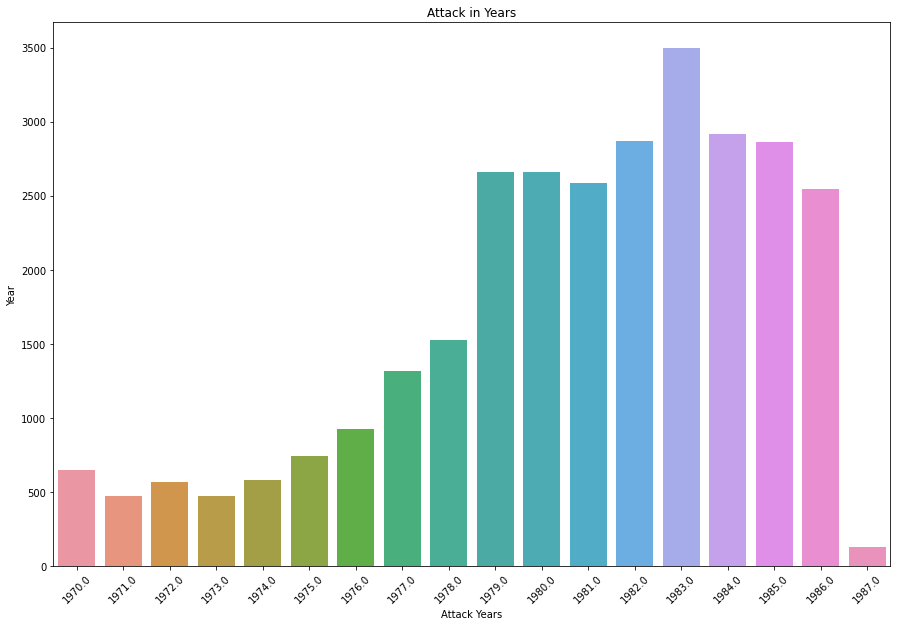

In [26]:
x_year = data['Year'].unique()
y_year = data['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(15,10))
plt.title("Attack in Years")
plt.xlabel("Attack Years")
plt.ylabel("Number of attacks each year")
plt.xticks(rotation=45)
sns.barplot(x=x_year, y=y_year)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


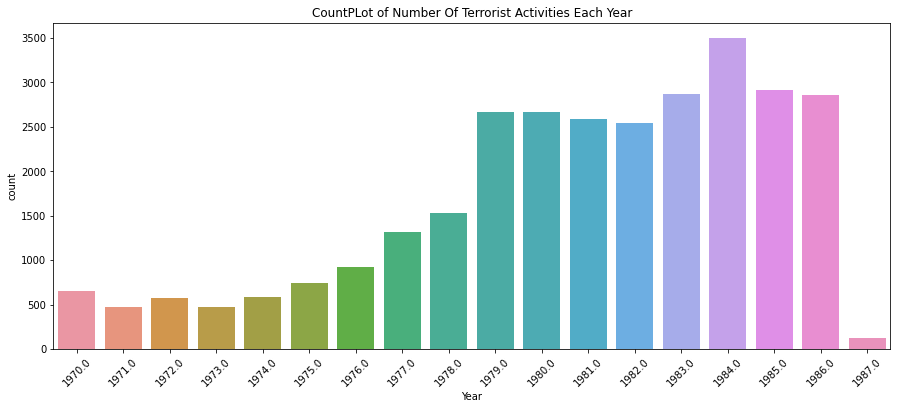

In [29]:
plt.subplots(figsize=(15,6))
sns.countplot('Year', data=data)
plt.xticks(rotation=45)
plt.title('CountPLot of Number Of Terrorist Activities Each Year')
plt.show()

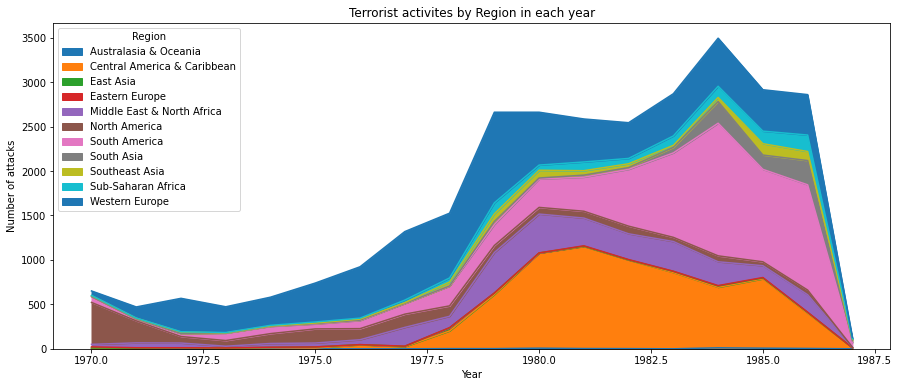

In [32]:
pd.crosstab(data.Year,data.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist activites by Region in each year')
plt.ylabel("Number of attacks")
plt.show()


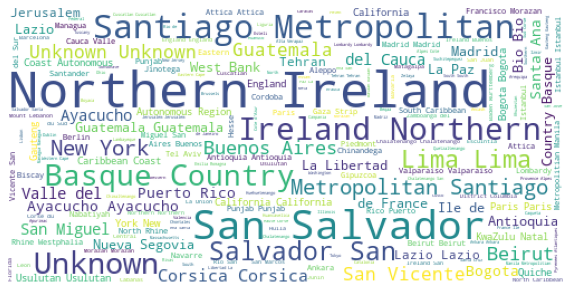

In [34]:
from wordcloud import WordCloud
from scipy import signal
cities=data.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud= WordCloud(background_color='white', width=500, height = 250).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [36]:
data['Wounded'] = data['Wounded'].fillna(0).astype(int)
data['Killed'] = data['Killed'].fillna(0).astype(int)
data['casualities'] = data['Killed'] + data['Wounded']

In [38]:
terror_copy = data.sort_values(by='casualities',ascending=False)[:30]

In [39]:
terror_copy.corr()

,Year,Month,Day,latitude,longitude,Killed,Wounded,casualities
Year,1.000000,-0.326931,0.068271,-0.390382,-0.043345,0.195018,-0.123012,-0.003557
Month,-0.326931,1.000000,-0.042929,0.268455,-0.151280,-0.161912,0.320901,0.306052
Day,0.068271,-0.042929,1.000000,-0.013281,-0.067465,0.104224,-0.100058,-0.049446
latitude,-0.390382,0.268455,-0.013281,1.000000,-0.116688,-0.333108,0.362240,0.212656
longitude,-0.043345,-0.151280,-0.067465,-0.116688,1.000000,-0.158574,-0.019608,-0.160573
Killed,0.195018,-0.161912,0.104224,-0.333108,-0.158574,1.000000,-0.696615,-0.109467
Wounded,-0.123012,0.320901,-0.100058,0.362240,-0.019608,-0.696615,1.000000,0.789390
casualities,-0.003557,0.306052,-0.049446,0.212656,-0.160573,-0.109467,0.789390,1.000000


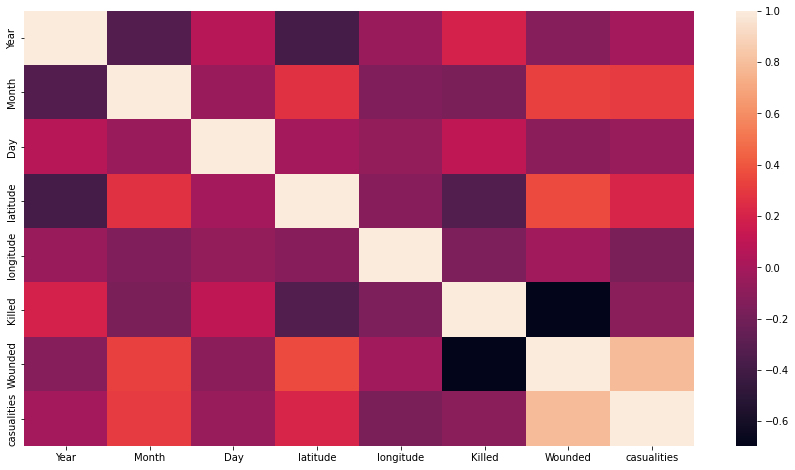

In [42]:
plt.figure(figsize=[15,8])
sns.heatmap(terror_copy.corr())
plt.show()

In [44]:
attack_country = data.Country.value_counts()[:15]
attack_country

El Salvador       3616
Peru              2671
United Kingdom    2503
Colombia          2123
United States     1891
Spain             1848
Nicaragua         1467
Guatemala         1440
Chile             1312
Italy             1262
France            1165
Lebanon            993
Turkey             625
Philippines        531
South Africa       521
Name: Country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


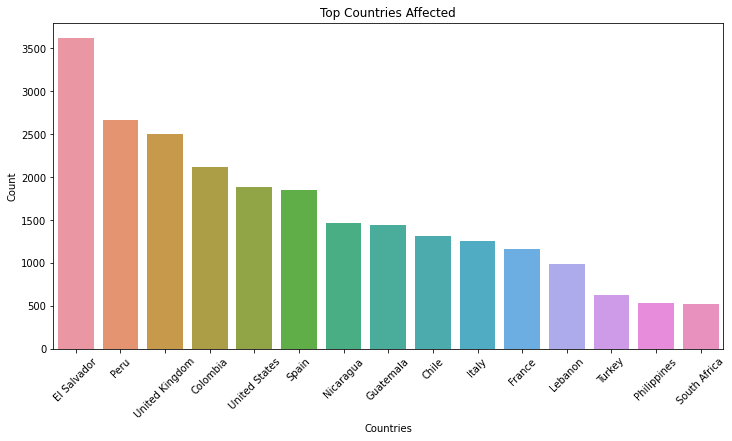

In [45]:
plt.subplots(figsize=(12,6))
sns.barplot(attack_country.index,attack_country.values)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

In [47]:
attack_groups = data.Group.value_counts()[1:15]
attack_groups

Shining Path (SL)                                   2027
Farabundo Marti National Liberation Front (FMLN)    1777
Irish Republican Army (IRA)                         1630
Basque Fatherland and Freedom (ETA)                 1125
Nicaraguan Democratic Force (FDN)                    816
M-19 (Movement of April 19)                          511
Palestinians                                         475
Revolutionary Armed Forces of Colombia (FARC)        472
African National Congress (South Africa)             335
Manuel Rodriguez Patriotic Front (FPMR)              333
Movement of the Revolutionary Left (MIR) (Chile)     287
Corsican National Liberation Front (FLNC)            284
National Liberation Army of Colombia (ELN)           243
Protestant extremists                                237
Name: Group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


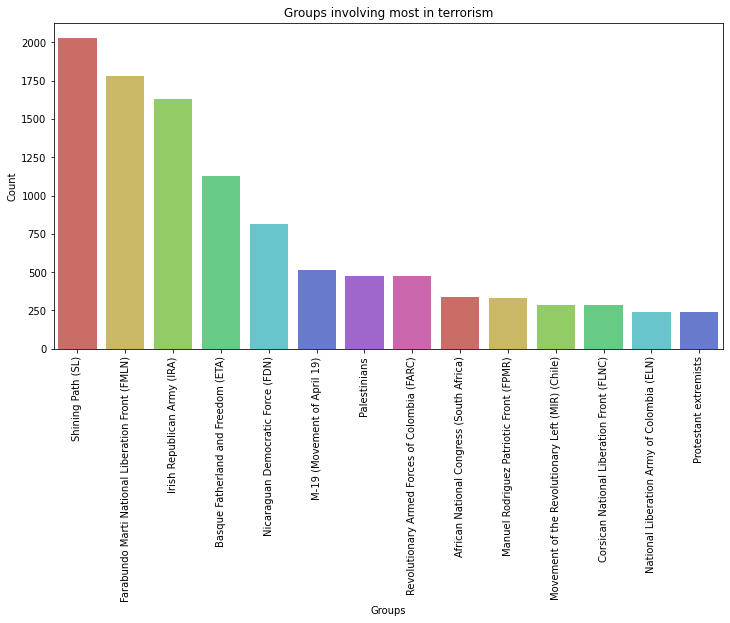

In [51]:
plt.subplots(figsize=(12,6))
sns.barplot(attack_groups.index,attack_groups.values,palette=sns.color_palette("hls", 8))
plt.title('Groups involving most in terrorism')
plt.xlabel('Groups')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [52]:
group_killed= data[['Group','Killed']].groupby(['Group'],axis=0).sum().sort_values('Killed', ascending=False).head(15)
group_killed

,Killed
Group,
Unknown,11446
Nicaraguan Democratic Force (FDN),6428
Farabundo Marti National Liberation Front (FMLN),6280
Shining Path (SL),5584
Democratic Revolutionary Alliance (ARDE),1803
Irish Republican Army (IRA),1401
Revolutionary Armed Forces of Colombia (FARC),1285
M-19 (Movement of April 19),1260
Tamils,976


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


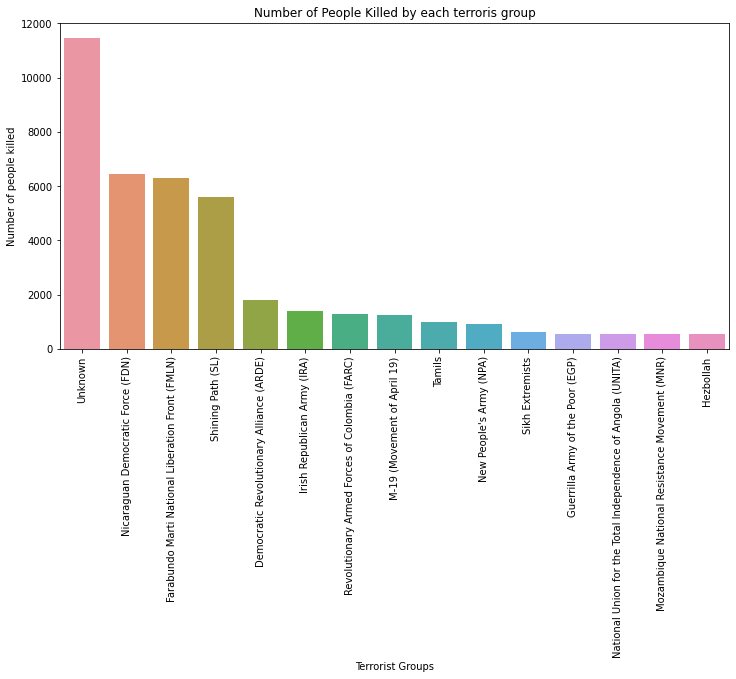

In [63]:
plt.subplots(figsize=(12,6))
sns.barplot(group_killed.index, group_killed.Killed.values)
plt.title('Number of People Killed by each terroris group')
plt.xlabel('Terrorist Groups')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


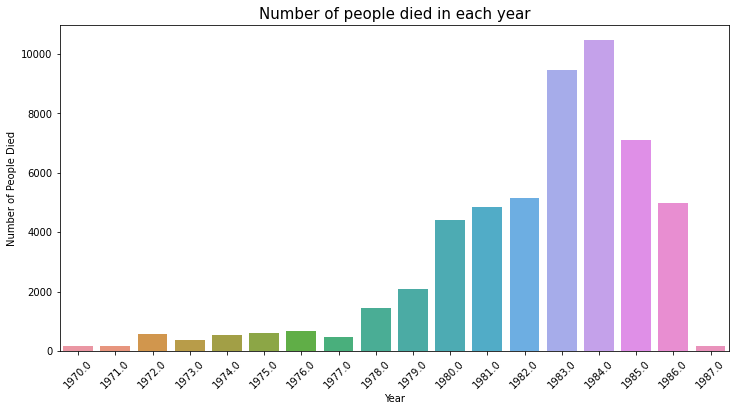

In [56]:
died_people = data[['Year','Killed']].groupby(['Year']).sum()
plt.subplots(figsize=(12,6))
sns.barplot(died_people.index, died_people.Killed.values)
plt.title("Number of people died in each year",fontsize=15)
plt.ylabel("Number of People Died")
plt.xlabel('Year')
plt.xticks(rotation = 45)
plt.show()

In [58]:
attack_cities = data.city.value_counts()[:15]
attack_cities

Unknown           1885
Belfast           1105
San Salvador      1050
Lima               909
Santiago           866
Beirut             564
Guatemala City     501
Rome               482
Paris              477
Bogota             435
New York City      400
Madrid             293
Athens             286
Buenos Aires       284
Ayacucho           271
Name: city, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


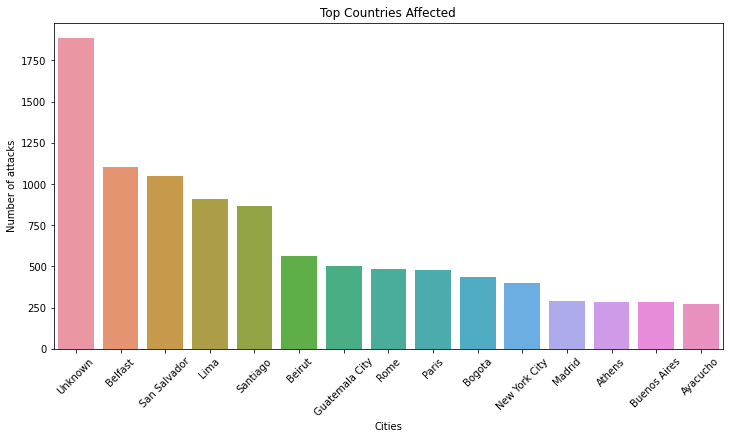

In [60]:
plt.subplots(figsize=(12,6))
sns.barplot(attack_cities.index,attack_cities.values)
plt.title('Top Countries Affected')
plt.xlabel('Cities')
plt.ylabel('Number of attacks')
plt.xticks(rotation= 45)
plt.show()

In [61]:
  data.Country.value_counts()[:15]

El Salvador       3616
Peru              2671
United Kingdom    2503
Colombia          2123
United States     1891
Spain             1848
Nicaragua         1467
Guatemala         1440
Chile             1312
Italy             1262
France            1165
Lebanon            993
Turkey             625
Philippines        531
South Africa       521
Name: Country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


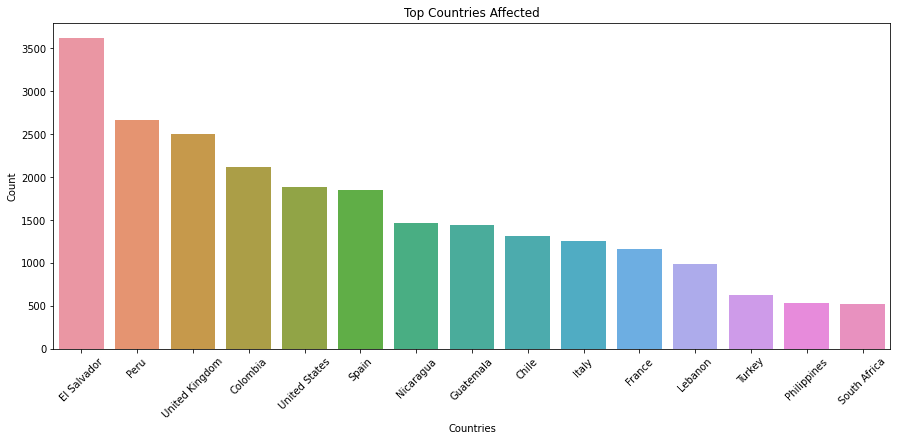

In [64]:
plt.subplots(figsize=(15,6))
sns.barplot(data['Country'].value_counts()[:15].index,data['Country'].value_counts()[:15].values)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Thus the hotspot of all the terrorist activities is 